In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
#warnings.simplefilter(action="ignore", category="FutureWarning")

In [2]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\US_Accidents_March23_sampled_500k\US_Accidents_March23_sampled_500k.csv")

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

We have missing data. Ending latitute and longitude data is missing by 44%. 

In [5]:
df.isna().sum().sort_values(ascending=False)/len(df)

End_Lat                  0.440754
End_Lng                  0.440754
Precipitation(in)        0.285232
Wind_Chill(F)            0.258034
Wind_Speed(mph)          0.073974
Visibility(mi)           0.022582
Wind_Direction           0.022394
Humidity(%)              0.022260
Weather_Condition        0.022202
Temperature(F)           0.020932
Pressure(in)             0.017856
Weather_Timestamp        0.015348
Nautical_Twilight        0.002966
Civil_Twilight           0.002966
Sunrise_Sunset           0.002966
Astronomical_Twilight    0.002966
Airport_Code             0.002892
Street                   0.001382
Timezone                 0.001014
Zipcode                  0.000232
City                     0.000038
Description              0.000002
Traffic_Signal           0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Country                  0.000000
Turning_Loop             0.000000
No_Exit       

Drop End_lat, End_lon, and Precipitation(in), and Wind_Chill(F) columns

In [6]:
df.drop(columns=["End_Lat", "End_Lng", "Precipitation(in)", "Wind_Chill(F)", "Description"], inplace=True)

In [7]:
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Highway 19,Zachary,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,0.056,Forest Ridge Dr,Sterling,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,0.022,Floradale Ave,Lompoc,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,500000.000000,500000.000000,500000.000000,500000.000000,489534.000000,488870.000000,491072.000000,488709.000000,463013.000000
mean,2.212748,36.206421,-94.736583,0.564317,61.646254,64.834921,29.536621,9.091540,7.681347
std,0.486661,5.071411,17.405761,1.774872,19.000133,22.826158,1.008666,2.708083,5.431361
min,1.000000,24.562117,-124.497420,0.000000,-77.800000,1.000000,0.120000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,0.000000,49.000000,48.000000,29.370000,10.000000,4.600000
50%,2.000000,35.832147,-87.794365,0.029000,64.000000,67.000000,29.860000,10.000000,7.000000
75%,2.000000,40.082443,-80.359601,0.465000,76.000000,84.000000,30.030000,10.000000,10.400000
max,4.000000,48.999569,-67.484130,193.479996,207.000000,100.000000,38.440000,130.000000,822.800000


<Axes: title={'center': 'Distribution of Accident by Severity'}, xlabel='Severity', ylabel='Frequency'>

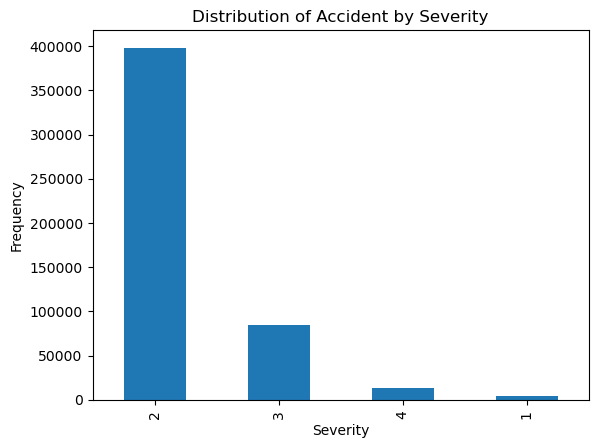

In [10]:
df["Severity"].value_counts().plot(
    kind="bar",
    ylabel="Frequency",
    title="Distribution of Accident by Severity"
)

A majority of the accidents are mildly severe at category 2 as compared to category 3 and 4. 

<Axes: title={'center': 'Accidents per City'}, xlabel='Number of Accidents', ylabel='City'>

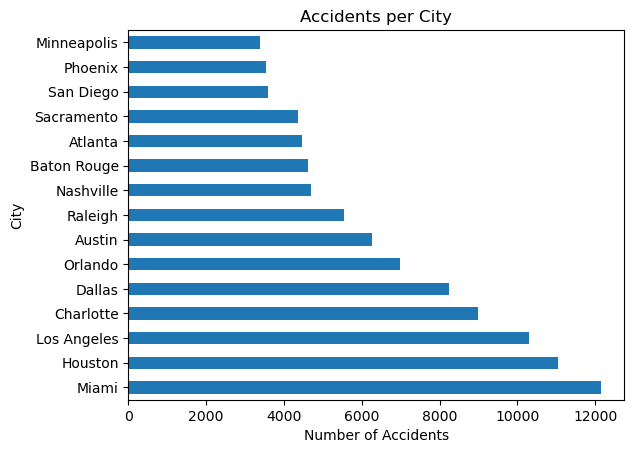

In [11]:
df["City"].value_counts().head(15).plot(
    kind="barh",
    xlabel="Number of Accidents",
    title="Accidents per City"
)

Miami records the highest accident occurences in the United States between 2016-2023 followed by Houston and Los Angeles. On the time of the accident, the histogram below shows majority of the accidents occured between 6:00 - 9:00 am in the morning and 14:00 - 19:00 hours in the afternoon. Further, it is i,mportant to understand the environmnetal conditions prevailing during the accident time. 

The map below shows the hotspots in miami city where accidents happen the most. Notably, road intersections report the highest instances of accidents. Lets explore weather conditions, exit points, and traffic signals at these locations. 

In [122]:
state = df["City"]=="Miami"
df_state = df[state]

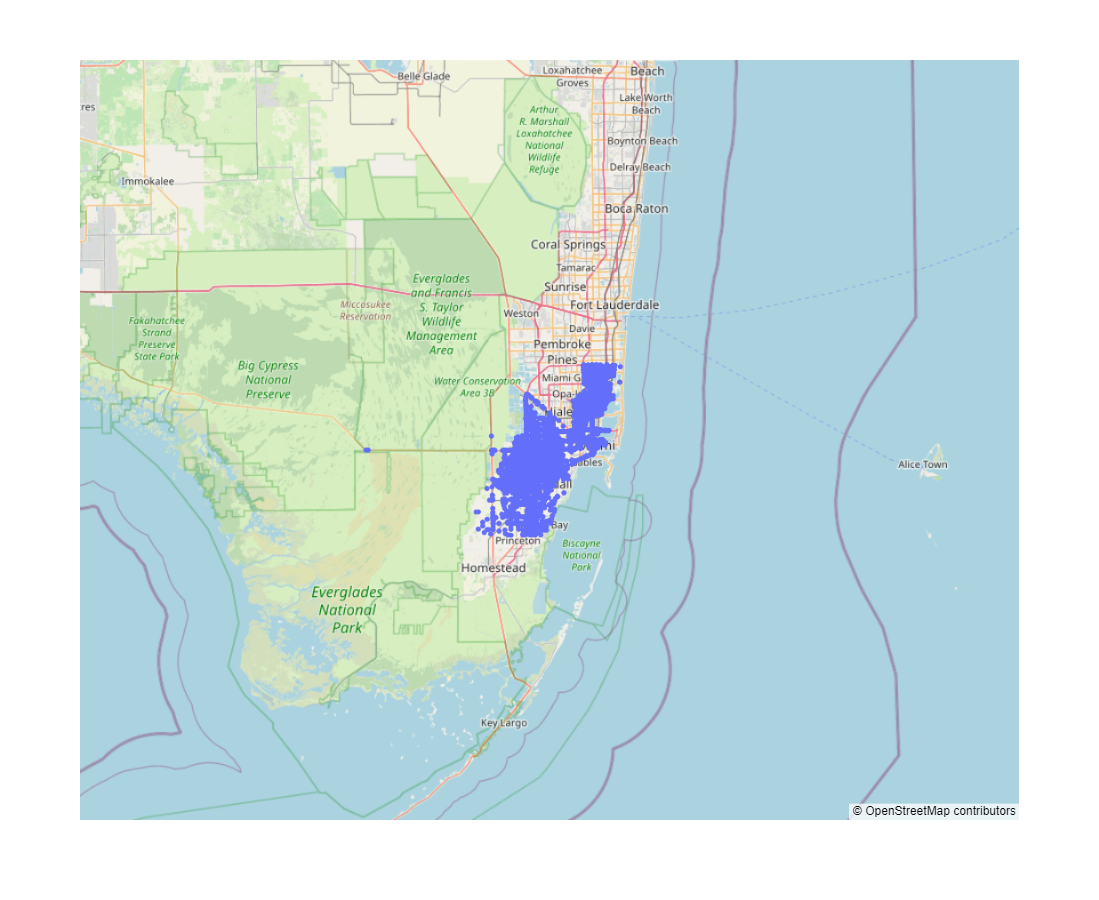

In [123]:
fig = px.scatter_mapbox(
    df[state],
    lat="Start_Lat",
    lon = "Start_Lng",
    width = 900,
    height = 900,
    hover_data = "Street"
)
fig.update_layout(mapbox_style = "open-street-map")
    

From a high level analysis, cloudy conditions, thunder and rain are cummulatively major contributors to road accidents. However, it is important to note significant proportion of accidents occur under fair weather conditions. 

<Axes: title={'center': 'Accident Weather Condition'}, xlabel='Percentage', ylabel='Weather_Condition'>

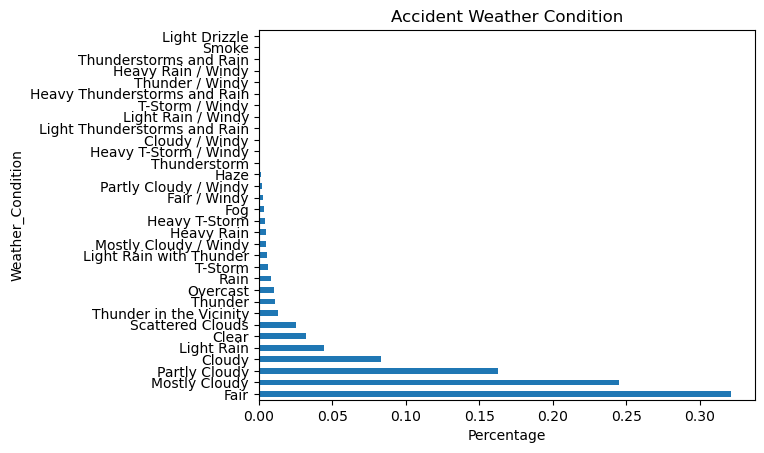

In [146]:
df_state["Weather_Condition"].value_counts(normalize=True).plot(kind="barh", xlabel="Percentage", title="Accident Weather Condition")

Also, more accidents were recorded in locations where there was no traffic signal compared to where there is traffic signals. 

In [ ]:
df_state["Traffic_Signal"] = df_state["Traffic_Signal"].astype(int)
df_state["No_Exit"] = df_state["No_Exit"].astype(int)
df_state["Crossing"] = df_state["Crossing"].astype(int)

<Axes: title={'center': 'Accident Distribution by Traffic-Signals Availability'}, xlabel='Traffic_Signal', ylabel='Frequency'>

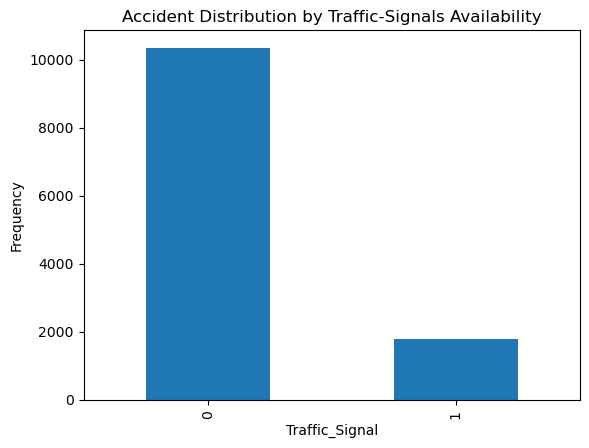

In [135]:
df_state["Traffic_Signal"].value_counts().plot(kind="bar", ylabel="Frequency", title="Accident Distribution by Traffic-Signals Availability")

When grouped by crossing and exit points, majority of accidents occured where there was neither. This might be an important point for policy holders and safety officials.

In [160]:
df_state.groupby(["Traffic_Signal", "Crossing"])["No_Exit"].count()

Traffic_Signal  Crossing
0               0           8186
                1           2162
1               0            746
                1           1047
Name: No_Exit, dtype: int64

In [87]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Start_Time"]

0        2019-06-12 10:10:56
1                        NaT
2                        NaT
3        2022-02-21 17:43:04
4        2020-12-04 01:46:00
                 ...        
499995   2021-12-15 07:30:00
499996   2021-12-19 16:25:00
499997   2022-04-13 19:28:29
499998   2020-05-15 17:20:56
499999   2022-04-02 23:23:13
Name: Start_Time, Length: 500000, dtype: datetime64[ns]

<Axes: xlabel='Start_Time', ylabel='Count'>

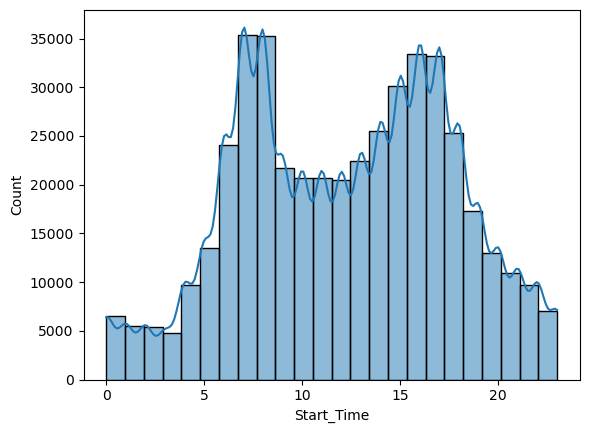

In [88]:
sns.histplot(df.Start_Time.dt.hour, bins=24, kde=True)

Majority of the accidents occured when the visibility is approximately 10 miles. We dig dipper to understand those accidents occuring when the visibility is a mile or less. 

<Axes: xlabel='Visibility(mi)', ylabel='Count'>

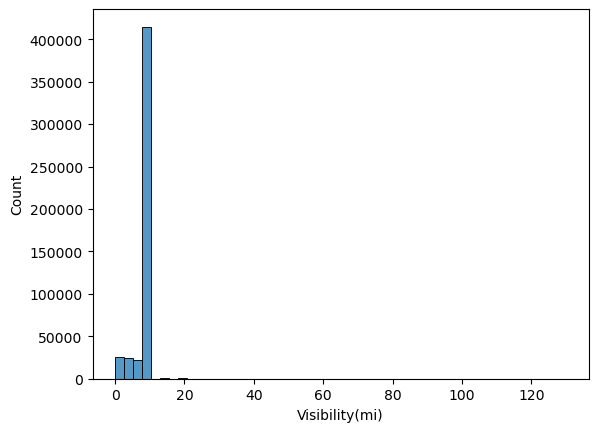

In [89]:
sns.histplot(df["Visibility(mi)"], bins=50)

Only a small proportion of accidents occured when area visibility is really low (less than a tenth of a mile). Thus, poor visibility is not largely attributed to accident-cause

In [90]:
Lowvis = df["Visibility(mi)"]<=1

<Axes: xlabel='Visibility(mi)', ylabel='Frequency'>

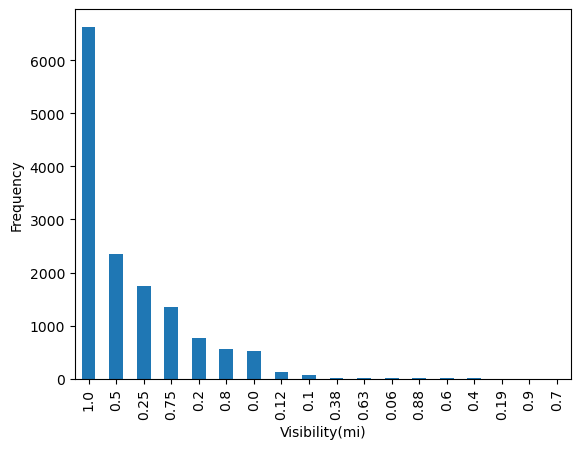

In [162]:
df[Lowvis]["Visibility(mi)"].value_counts().plot(kind="bar", ylabel="Frequency")